In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from lxml import html

### Access the website https://db-engines.com/en/ranking, perform web scraping, and generate a DataFrame with the list of ranked databases.

In [2]:
url = "https://db-engines.com/en/ranking"
response = requests.get(url)
response.raise_for_status()
tree = html.fromstring(response.text)
rows = tree.cssselect('table.dbi tr')

data = []
for row in rows[3:]:
    cols = row.xpath('./td | ./th')

    if len(cols) >= 6:
        rank = cols[0].text_content().strip().replace('.','')
        name = cols[3].text_content().strip()[0:12]
        score = cols[5].text_content().strip()
        data.append([rank, name, score])
df = pd.DataFrame(data, columns=["Rank", "Database", "Score"])

print(df.head())

  Rank      Database    Score
0    1        Oracle  1212.77
1    2         MySQL   879.66
2    3  Microsoft SQ   715.05
3    4    PostgreSQL   643.20
4    5  MongoDB Deta   368.01


### Using Seaborn, create a bar chart showing the database names and their scores for the current month.

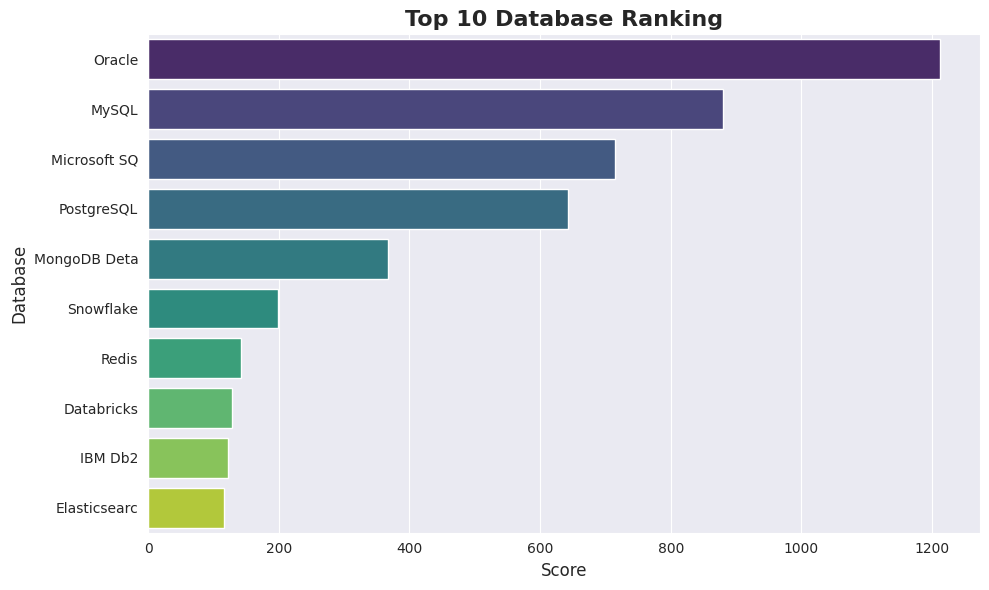

In [16]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.title('Top 10 Database Ranking', fontsize=16, fontweight='bold')

top10 = df[:10].sort_values('Score', ascending=False)

sns.barplot(x='Score', y='Database', data=top10, hue='Database', palette='viridis', legend=False)

plt.xlabel('Score', fontsize=12)
plt.ylabel('Database', fontsize=12)
plt.tight_layout()
plt.show()

### Create a new DataFrame with only the top 10 databases. Add a column Share showing each database's percentage of relevance relative to the top 10 total scores. Display the name and percentage of the top-ranked database.

### Using Matplotlib, create a chart showing the Share of each database among the top 10.

### Using the full DataFrame, create a new Share column showing the percentage relevance of each database relative to all others.

### Save the full DataFrame as a CSV file named db-ranking.csv.

### Use the Brazilian Central Bank’s API to get the USD exchange rate. Retrieve the selling rate for September 16, 2008, using JSON.